In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [2]:
def TMA(x, N): # tridiagonal matrix algorithm == метод прогонки
    h = (b - a) / N
    D = [f_a] + [f(s) * h * h for s in x[1:-1]] + [f_b]
    A = [0] + [ 1 for i in range(N - 2)] + [0]
    B = [1] + [-2 for i in range(N - 2)] + [1]
    C = [0] + [ 1 for i in range(N - 2)] + [0]
    for i in range(1, N):          # прямой ход метода Гаусса -- избавляемся от коэффициентов под главной диагональю
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    y = np.zeros(N)
    y[N - 1] = D[N - 1] / B[N - 1] # обратный ход метода Гаусса
    for i in np.arange(N - 2, -1, -1):
        y[i] = (D[i] - C[i] * y[i + 1]) / B[i]
    return y

In [3]:
def error(x, sol : np.array):
    ex = np.array([exact(s) for s in x])
    error = abs(ex - sol)
    return max(error)

In [4]:
f_a, f_b = -2.,5.
a, b = 0., np.pi
N = 10**2

In [5]:
f = lambda x: np.sin(x)
exact = lambda x: -np.sin(x) + x * (f_b - f_a) / np.pi + f_a

---

In [6]:
x_ex = np.linspace(a, b, 100) # массив значений для графика точного решения
ex = [exact(s) for s in x_ex]

In [7]:
x = np.linspace(a, b, N) # решение по методу прогонки
tma = TMA(x, N)

In [8]:
error(x, tma)

0.019815254649192093

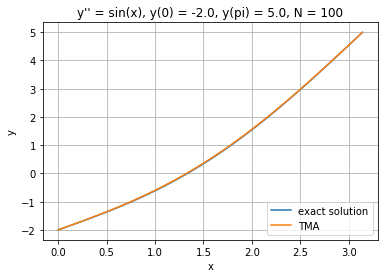

In [9]:
plt.figure()

plt.plot(x_ex, ex, label='exact solution')
plt.plot(x, tma, '-', label='TMA')

plt.legend(loc=4)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y\'\' = sin(x), y(0) = ' + str(f_a) + ', y(pi) = ' + str(f_b) + ', N = ' + str(N))
plt.show()

In [10]:
MAX = 17
K = 2 ** np.arange(2, MAX)
err = []
for k in K:
    t = np.linspace(a, b, k)
    sol = TMA(t, k)
    err += [error(t, sol)]

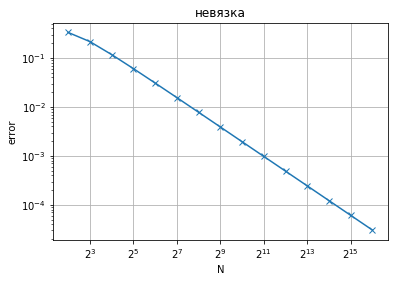

In [11]:
plt.figure()

plt.plot(K, err, '-x')
plt.xscale('log', basex=2)
plt.yscale('log')
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
plt.title('невязка')
plt.show()